## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data_df =pd.merge(mouse_metadata, study_results, on='Mouse ID', how='left')

# Display the data table for preview
merged_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
merged_data_df['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data = merged_data_df.loc[merged_data_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_data_df.loc[merged_data_df['Mouse ID']=='g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = merged_data_df.loc[merged_data_df['Mouse ID']!='g989']
clean_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_data_df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Grouping data by drug regimen and statistics calculations
mean = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
std_error_means = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
       
# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_stats_df = pd.DataFrame({'Mean': mean,
                                'Median': median,
                                'Variance': variance,
                                'Standard Deviation': std,
                                'SEM': std_error_means})

# Display formatted summary statistics
summary_stats_df.style.format({'Mean':'{:.3f}',
                              'Median':'{:.3f}',
                               'Variance':'{:.3f}',
                               'Standard Deviation':'{:.3f}',
                               'SEM':'{:.3f}'})


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

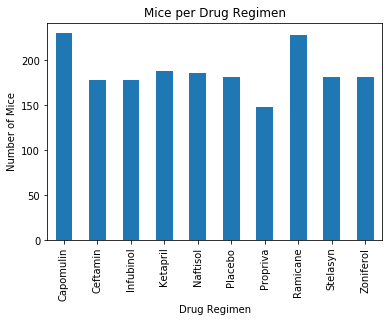

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
# Group data by drug treatment # mice on drug treatments
mice_per_treatment = clean_data_df.groupby('Drug Regimen')['Mouse ID'].count()

# Generate bar plot and set labels
mice_per_treatment_plot = mice_per_treatment.plot(kind='bar', title='Mice per Drug Regimen')
mice_per_treatment_plot.set_ylabel('Number of Mice')

plt.show()


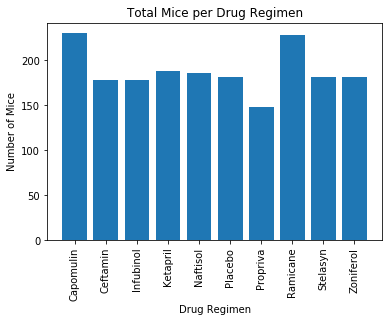

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# Create x-ticker loactions
x_axis = np.arange(len(mice_per_treatment))

# Create list of x-axis labels
drug_regimens = summary_stats_df.index.tolist()

# Generate bar plot and add labels
plt.bar(x_axis, mice_per_treatment, align='center')
plt.xticks(x_axis, drug_regimens, rotation=90)
plt.title('Total Mice per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.show()

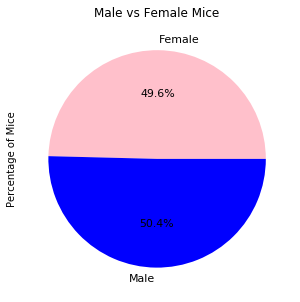

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Grouping data by sex and counting number of mice per sex
mice_sex = clean_data_df.groupby('Sex')['Mouse ID'].nunique()

# The colors of each section of the pie chart
colors = ["pink", "blue"]

# Generating pie plot and add formatting and labels
mice_sex_plot = mice_sex.plot(kind='pie', title='Male vs Female Mice', autopct="%1.1f%%", figsize=(5,5), fontsize=11, colors=colors)
mice_sex_plot.set_ylabel('Percentage of Mice')
plt.show()

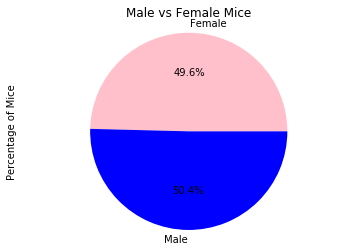

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Create list of x-axis labels
labels_sex = sorted(clean_data_df['Sex'].unique())

# The colors of each section of the pie chart
colors = ["pink", "blue"]

# Generating pie plot and add formatting and labels
plt.pie(mice_sex, autopct="%1.1f%%", labels=labels_sex, colors=colors)
plt.title('Male vs Female Mice')
plt.ylabel('Percentage of Mice')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_data_df.groupby('Mouse ID')['Timepoint'].max()
max_timepoint_df = pd.DataFrame(max_timepoint)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data2_df =pd.merge(clean_data_df, max_timepoint_df, on='Mouse ID')
merged_data2_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,45
1876,z969,Naftisol,Male,9,30,30,65.841013,3,45
1877,z969,Naftisol,Male,9,30,35,69.176246,4,45
1878,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
best_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
    
# Locate the rows which contain mice on each drug and get the tumor volumes
mouse_maxTime_df = merged_data2_df.loc[merged_data2_df['Timepoint_x'] == merged_data2_df['Timepoint_y']]
mouse_maxTime_df = mouse_maxTime_df.sort_values(by='Drug Regimen').reset_index(drop=True)

# Add subset for: 
# Capomulin 
capomulin_df = mouse_maxTime_df.loc[mouse_maxTime_df['Drug Regimen'] == 'Capomulin']
# del capomulin_df['Timepoint_y']
# capomulin_df = capomulin_df.rename(columns={'Timepoint_x':'Timepoint'}).reset_index(drop=True)
capomulin_tumorVol = pd.DataFrame(capomulin_df['Tumor Volume (mm3)'])
capomulin_tumorVol = capomulin_tumorVol.rename(columns={'Tumor Volume (mm3)':'Capomulin'}).sort_values(by='Capomulin').reset_index(drop=True)

# Ramicane
ramicane_df = mouse_maxTime_df.loc[mouse_maxTime_df['Drug Regimen'] == 'Ramicane']
# del ramicane_df['Timepoint_y']
# ramicane_df = ramicane_df.rename(columns={'Timepoint_x':'Timepoint'}).reset_index(drop=True)
ramicane_tumorVol = pd.DataFrame(ramicane_df['Tumor Volume (mm3)'])
ramicane_tumorVol = ramicane_tumorVol.rename(columns={'Tumor Volume (mm3)':'Ramicane'}).sort_values(by='Ramicane').reset_index(drop=True)

# Infubinol
infubinol_df = mouse_maxTime_df.loc[mouse_maxTime_df['Drug Regimen'] == 'Infubinol']
# del infubinol_df['Timepoint_y']
# infubinol_df = infubinol_df.rename(columns={'Timepoint_x':'Timepoint'}).reset_index(drop=True)
infubinol_tumorVol = pd.DataFrame(infubinol_df['Tumor Volume (mm3)'])
infubinol_tumorVol = infubinol_tumorVol.rename(columns={'Tumor Volume (mm3)':'Infubinol'}).sort_values(by='Infubinol').reset_index(drop=True)

# Ceftamin
ceftamin_df = mouse_maxTime_df.loc[mouse_maxTime_df['Drug Regimen'] == 'Ceftamin']
# del ceftamin_df['Timepoint_y']
# ceftamin_df = ceftamin_df.rename(columns={'Timepoint_x':'Timepoint'}).reset_index(drop=True)
ceftamin_tumorVol = pd.DataFrame(ceftamin_df['Tumor Volume (mm3)'])
ceftamin_tumorVol = ceftamin_tumorVol.rename(columns={'Tumor Volume (mm3)':'Ceftamin'}).sort_values(by='Ceftamin').reset_index(drop=True)


# Summarizing Tumor Volumes across Drug Regimens
data = [capomulin_tumorVol['Capomulin'], 
        ramicane_tumorVol['Ramicane'], 
        infubinol_tumorVol['Infubinol'], 
        ceftamin_tumorVol['Ceftamin']]

# Grouping separate data frams to one
drug_Regimen_TumorVol = pd.concat(data, axis=1, keys=best_regimens)

## The final tumor volume of each mouse across four of the most promising treatment regimens are:


In [15]:
drug_Regimen_TumorVol

,Capomulin,Ramicane,Infubinol,Ceftamin
0,23.343598,22.050126,36.321346,45.000000
1,28.430964,29.128472,45.699331,45.000000
2,28.484033,30.276232,46.250112,45.000000
3,30.485985,30.564625,47.010364,45.000000
4,31.023923,30.638696,50.005138,46.784535
5,31.896238,31.095335,51.542431,47.784682
6,32.377357,31.560470,54.048608,48.722078
7,33.329098,32.978522,54.656549,52.925348
8,34.455298,33.397653,55.629428,55.742829
9,36.041047,33.562402,55.650681,56.057749


In [15]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Capomulin
cap = capomulin_tumorVol['Capomulin']
quartiles = cap.quantile([.25,.5,.75]).round(2)
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = round(upperq-lowerq,2)

print(f"The lower quartile of Capomulin is: {lowerq}")
print(f"The upper quartile of Capomulin is: {upperq}")
print(f"The interquartile range of Capomulin is: {iqr}")
print(f"The the median of Capomulin is: {quartiles[0.5]} ")

lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)
print(f"Values below {lower_bound} for Capomulin could be outliers.")
print(f"Values above {upper_bound} for Capomulin could be outliers.")
print("----------------------------------------------------")
print("")

# Ramicane
ram = ramicane_tumorVol['Ramicane']
quartiles = ram.quantile([.25,.5,.75]).round(2)
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = round(upperq-lowerq,2)

print(f"The lower quartile of Ramicane is: {lowerq}")
print(f"The upper quartile of Ramicane is: {upperq}")
print(f"The interquartile range of Ramicane is: {iqr}")
print(f"The the median of Ramicane is: {quartiles[0.5]} ")

lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)
print(f"Values below {lower_bound} for Ramicane could be outliers.")
print(f"Values above {upper_bound} for Ramicane could be outliers.")
print("----------------------------------------------------")
print("")

# Infubinol
inf = infubinol_tumorVol['Infubinol']
quartiles = inf.quantile([.25,.5,.75]).round(2)
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = round(upperq-lowerq,2)

print(f"The lower quartile of Infubinol is: {lowerq}")
print(f"The upper quartile of Infubinol is: {upperq}")
print(f"The interquartile range of Infubinol is: {iqr}")
print(f"The the median of Infubinol is: {quartiles[0.5]} ")

lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)
print(f"Values below {lower_bound} for Infubinol could be outliers.")
print(f"Values above {upper_bound} for Infubinol could be outliers.")
print("----------------------------------------------------")
print("")

# Ceftamin
cef = ceftamin_tumorVol['Ceftamin']
quartiles = cef.quantile([.25,.5,.75]).round(2)
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = round(upperq-lowerq,2)

print(f"The lower quartile of Ceftamin is: {lowerq}")
print(f"The upper quartile of Ceftamin is: {upperq}")
print(f"The interquartile range of Ceftamin is: {iqr}")
print(f"The the median of Ceftamin is: {quartiles[0.5]} ")

lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)
print(f"Values below {lower_bound} for Ceftamin could be outliers.")
print(f"Values above {upper_bound} for Ceftamin could be outliers.")
print("----------------------------------------------------")
print("")

# Determine outliers using upper and lower bounds
    

The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.13 
Values below 20.71 for Capomulin could be outliers.
Values above 51.83 for Capomulin could be outliers.
----------------------------------------------------

The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The the median of Ramicane is: 36.56 
Values below 17.91 for Ramicane could be outliers.
Values above 54.31 for Ramicane could be outliers.
----------------------------------------------------

The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The the median of Infubinol is: 60.17 
Values below 36.83 for Infubinol could be outliers.
Values above 82.75 for Infubinol could be outliers.
----------------------------------------------------

The lower quartile of Cef

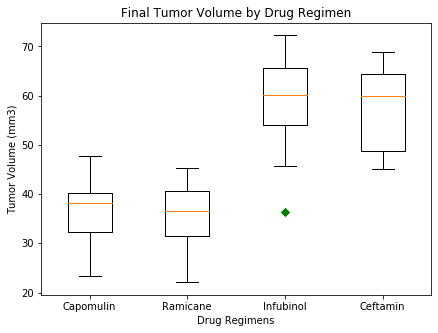

In [37]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots(figsize=(7,5))
ax1.set_title('Final Tumor Volume by Drug Regimen')
ax1.set_xlabel('Drug Regimens')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(data, sym='gD')
plt.xticks([1,2,3,4],best_regimens)

plt.show()

## Line and Scatter Plots

In [39]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Create Capomulin data df
capomulin_data = clean_data_df.loc[clean_data_df['Drug Regimen'] == 'Capomulin']
capomulin_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


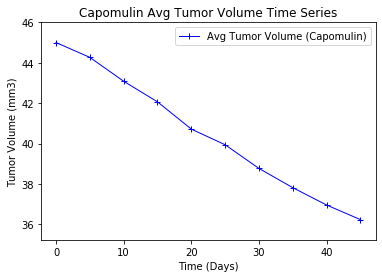

In [95]:
# Group data by timepoint and get mean of tumor volume
tumor_vol_mean = capomulin_data.groupby('Timepoint')['Tumor Volume (mm3)'].mean().round(3)
cap_time_tumorVol = pd.DataFrame({'Avg Tumor Volume (Capomulin)':tumor_vol_mean})

# Create list of Timepoints and mean tumor volumes
timepoints = list(cap_time_tumorVol.index.values)
cap_tumorVol_mean = list(cap_time_tumorVol['Avg Tumor Volume (Capomulin)'].values)

# Lineplot of timeseries and mean tumor volume with configuration
v, = plt.plot(timepoints, cap_tumorVol_mean, marker="+", color="blue", linewidth="1", label ='Avg Tumor Volume (Capomulin)')

plt.title('Capomulin Avg Tumor Volume Time Series')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend(handles= [v], loc="upper right")

# Set limits
plt.ylim(min(cap_tumorVol_mean)-1,max(cap_tumorVol_mean)+1)
plt.show()

In [99]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Group data by timepoint and get mean of tumor volume
cap_mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean().round(3)
cap_mouse_tumorVol_mean = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().round(3)
cap_weight_tumorVol = pd.DataFrame({'Mouse Weight (g)':cap_mouse_weight,
                                    'Capomulin Avg Tumor Volume (mm3)':cap_mouse_tumorVol_mean})
cap_weight_tumorVol

,Mouse Weight (g),Capomulin Avg Tumor Volume (mm3)
Mouse ID,,
b128,22,41.964
b742,21,40.084
f966,17,36.506
g288,19,41.990
g316,22,44.613
i557,24,44.806
i738,20,39.141
j119,23,44.465
j246,21,43.217


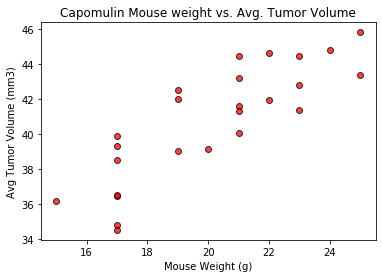

In [107]:
# Create scatter plot of weight and mean tumor volume with configuration
plt.scatter(
    cap_weight_tumorVol['Mouse Weight (g)'], 
    cap_weight_tumorVol['Capomulin Avg Tumor Volume (mm3)'],
    marker="o", 
    facecolor="red", 
    edgecolors="black",
    alpha = 0.75)

plt.title('Capomulin Mouse weight vs. Avg. Tumor Volume')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
